# 4.3 Hermite interpolation

In polynomial interpolation, our starting point has been the $x$- and $y$-coordinates of some data we want to interpolate. Suppose, in addition, we know the derivative of the underlying function at these $x$-coordinates. Our new data set has the following form.

**Data:**
- $x_{0},x_{1},...,x_{n}$
- $y_{0},y_{1},...,y_{n};\, y_{i}=f(x_{i})$
- $y_{0}',y_{1}',...,y_{n}';\, y'_{i}=f'(x_{i})$

We seek a polynomial that fits the $y$ and $y'$ values, that is, we seek a polynomial $H(x)$ such that $H(x_{i})=y_{i}$ and $H'(x_{i})=y'_{i}$,
$i=0,1,...,n.$ This makes $2n+2$ equations, and if we let
\begin{equation*}
H(x)=a_{0}+a_{1}x+...+a_{2n+1}x^{2n+1},
\end{equation*}
then there are $2n+2$ unknowns, $a_0,...,a_{2n+1}$, to solve for. The following theorem shows that there is a unique solution to this system of equations; a proof can be found in Burden et al. [2016].

\begin{theorem}\label{theo:chap3_thm61}
If $f \in C^1[a,b]$ and $x_{0},...,x_{n}\in[a,b]$
are distinct, then there is a unique polynomial $H_{2n+1}(x)$, of degree at most $2n+1$, agreeing with
$f$ and $f'$ at $x_{0},...,x_{n}$. The polynomial can be written as:
\begin{equation*}
H_{2n+1}(x)=\sum_{i=0}^{n}y_{i}h_{i}(x)+\sum_{i=0}^{n}y_{i}'\tilde{h_{i}}(x)
\end{equation*}
where
\begin{align*}
h_{i}(x) & =\left(1-2(x-x_{i})l'_{i}(x_{i})\right)(l_{i}(x))^{2}\\
\widetilde{h}_{i}(x) & =(x-x_{i})(l_{i}(x))^{2}.
\end{align*}
Here $l_{i}(x)$ is the $i$th Lagrange basis function for the nodes
$x_{0},...,x_{n}$, and $l'_{i}(x)$ is its derivative. $H_{2n+1}(x)$ is called the Hermite interpolating
polynomial.
\end{theorem}

The only difference between Hermite interpolation and polynomial interpolation is that in the former, we have the derivative information, which can go a long way in capturing the shape of the underlying function.

\begin{example}\label{example:chap3_exa62}
We want to interpolate the following data:
\begin{align*}
x \text{-coordinates}&: -1.5, 1.6, 4.7\\
y \text{-coordinates}&: 0.071,-0.029,-0.012.
\end{align*}
The underlying function the data comes from is $\cos x$, but we pretend we do not know this. The figure below plots the underlying function, the data, and the polynomial interpolant for the data. Clearly, the polynomial interpolant does not come close to giving a good approximation to the underlying function $\cos x$.
\end{example}

![](./images/hermite_cos1.png)

Now let's assume we know the derivative of the underlying function at these nodes:
\begin{align*}
x \text{-coordinates}&: -1.5, 1.6, 4.7\\
y \text{-coordinates}&: 0.071,-0.029,-0.012\\
y' \text{-values}&: 1, -1, 1.
\end{align*}

We then construct the Hermite interpolating polynomial, incorporating the derivative information. The figure below plots the Hermite interpolating polynomial, together with the polynomial interpolant, and the underlying function.

It is visually difficult to separate the Hermite interpolating polynomial from the underlying function $\cos x$ in the following figure. Going from polynomial interpolation to Hermite interpolation results in rather dramatic improvement in approximating the underlying function.

![](./images/hermite_cos2.png)

## Computing the Hermite polynomial

We do not use Theorem \ref{theo:chap3_thm61} to compute the Hermite polynomial: there
is a more efficient method using divided differences for this computation.

We start with the data:
\begin{align*}
&x_{0},x_{1},...,x_{n}\\
&y_{0},y_{1},...,y_{n}; y_{i}=f(x_{i})\\
&y_{0}',y_{1}',...,y_{n}';y'_{i}=f'(x_{i})\\
\end{align*}
and define a sequence $z_{0},z_{1},...,z_{2n+1}$ by
\begin{align*}
z_{0} & =x_{0},z_{2}=x_{1},z_{4}=x_{2},...,z_{2n}=x_{n}\\
z_{1} & =x_{0},z_{3}=x_{1},z_{5}=x_{2},...,z_{2n+1}=x_{n}
\end{align*}
i.e., $z_{2i}=z_{2i+1}=x_{i},$ for $i=0,1,...,n.$

Then the Hermite polynomial can be written as:
\begin{align*}
H_{2n+1}(x) =& f[z_{0}]+f[z_{0},z_{1}](x-z_{0})+f[z_{0},z_{1},z_{2}](x-z_{0})(x-z_{1})+\\
 & \ldots+f[z_{0},z_{1},...,z_{2n+1}](x-z_{0})\cdots(x-z_{2n})\\
  =&f[z_{0}]+\sum_{i=1}^{2n+1}f[z_{0},....,z_{i}](x-z_{0})(x-z_{1})\cdots(x-z_{i-1}).
\end{align*}
There is a little problem with some of the first divided differences above: they are undefined! Observe that
\begin{equation*}
f[z_{0},z_{1}]=f[x_{0},x_{0}]=\frac{f(x_{0})-f(x_{0})}{x_{0}-x_{0}}
\end{equation*}
or, in general,
\begin{equation*}
f[z_{2i},z_{2i+1}]=f[x_{i},x_{i}]=\frac{f(x_{i})-f(x_{i})}{x_{i}-x_{i}}
\end{equation*}
for $i=0,...,n.$

From Theorem 1 Chapter4-2, we know $f[x_{0},...,x_{n}]=\frac{f^{(n)}(\xi)}{n!}$
for some $\xi$ between the min and max of $x_{0},...,x_{n}.$ From
a classical result by Hermite \& Gennochi (see Atkinson [1989], page 144), divided differences are
continuous functions of their variables $x_{0},...,x_{n}.$ This implies
we can take the limit of the above result as $x_{i}\rightarrow x_{0}$
for all $i,$ which results in
\begin{equation*}
f[x_{0},...,x_{0}]=\frac{f^{(n)}(x_{0})}{n!}.
\end{equation*}
Therefore in the Hermite polynomial coefficient calculations, we will
put
\begin{equation*}
f[z_{2i},z_{2i+1}]=f[x_{i},x_{i}]=f'(x_{i})=y'_{i}
\end{equation*}
for $i=0,1,...,n.$

\begin{example}\label{example:chap3_exa63}
Let's compute the Hermite polynomial of Example \ref{example:chap3_exa62}. The data is:

\begin{equation*}
\begin{array}{cccc}
i & x_{i} & y_{i} & y_{i}'\\
0 & -1.5 & 0.071 & 1\\
1 & 1.6 & -0.029 & -1\\
2 & 4.7 & -0.012 & 1\\
\end{array}
\end{equation*}
Here $n=2,$ and $2n+1=5,$ so the Hermite polynomial is
\begin{equation*}
H_{5}(x)=f[z_{0}]+\sum_{i=1}^{5}f[z_{0},...,z_{i}](x-z_{0})\cdots(x-z_{i-1}).
\end{equation*}
The divided differences are:

\begin{equation*}
\begin{array}{ccccccc}
{\small{}z} & {\small{}f(z)} & {\small{}\text{1st diff}} & {\small{}\text{2nd diff}} & {\small{}\text{3rd diff}} & {\small{}\text{4th diff}} & {\small{}\text{5th diff}}\\
\hline
{\small{}z_{0}=-1.5} & {\small{}\color{blue}{0.071}} &  &  &  &  & \\
 &  & {\small{}f'(z_{0})=\color{blue}{1}} &  &  &  & \\
{\small{}z_{1}=-1.5} & {\small{}0.071} &  & {\small{}\frac{-0.032-1}{1.6+1.5}=\color{blue}{-0.33}} &  &  & \\
 &  & {\small{}f[z_{1},z_{2}]=-0.032} &  & {\small{}\color{blue}{0.0065}} &  & \\
{\small{}z_{2}=1.6} & {\small{}-0.029} &  & {\small{}\frac{-1+0.032}{1.6+1.5}=-0.31} &  & {\small{}\color{blue}{0.015}} & \\
 &  & {\small{}f'(z_{2})=-1} &  & {\small{}0.10} &  & {\small{}\color{blue}{-0.005}}\\
{\small{}z_{3}=1.6} & {\small{}-0.029} &  & {\small{}\frac{0.0055+1}{4.7-1.6}=0.32} &  & {\small{}-0.016} & \\
 &  & {\small{}f[z_{3},z_{4}]=0.0055} &  & {\small{}0} &  & \\
{\small{}z_{4}=4.7} & {\small{}-0.012} &  & {\small{}\frac{1-0.0055}{4.7-1.6}=0.32} &  &  & \\
 &  & {\small{}f'(z_{4})=1} &  &  &  & \\
{\small{}z_{5}=4.7} & {\small{}-0.012} &  &  &  &  & \\
\hline
\end{array}
\end{equation*}

Therefore, the Hermite polynomial is:
\begin{align*}
H_{5}(x) =&\color{blue}{0.071}+\color{blue}{1}(x+1.5)\color{blue}{-0.33}(x+1.5)^{2}+\color{blue}{0.0065}(x+1.5)^{2}(x-1.6)+\\
 & +\color{blue}{0.015}(x+1.5)^{2}(x-1.6)^{2}\color{blue}{-0.005}(x+1.5)^{2}(x-1.6)^{2}(x-4.7).
\end{align*}
\end{example}

## Python code for computing Hermite interpolating polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

 The following function **hdiff** computes the divided
differences needed for Hermite interpolation. It is based on the
function **diff** for computing divided differences for Newton
interpolation. The inputs to **hdiff** are the $x$-coordinates,
the $y$-coordinates, and the derivatives **yprime}**.

In [2]:
def hdiff(x, y, yprime):
    m = x.size # here m is the number of data points. Note n=m-1
    # and 2n+1=2m-1
    l = 2*m
    z = np.zeros(l)
    a = np.zeros(l)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    for i in range(m):
        a[2*i] = y[i]
        a[2*i+1] = y[i]
    for i in np.flip(np.arange(1, m)): # computes the first divided
        # differences using derivatives
        a[2*i+1] = yprime[i]
        a[2*i] = (a[2*i]-a[2*i-1]) / (z[2*i]-z[2*i-1])
    a[1] = yprime[0]
    for j in range(2, l): # computes the rest of the divided differences
        for i in np.flip(np.arange(j, l)):
            a[i]=(a[i]-a[i-1]) / (z[i]-z[i-j])
    return a

Let's compute the divided differences of \ref{example:chap3_exa62}.

In [3]:
hdiff(np.array([-1.5, 1.6, 4.7]),
      np.array([0.071,-0.029,-0.012]), 
      np.array([1,-1,1]))

array([ 0.071     ,  1.        , -0.33298647,  0.00671344,  0.0154761 ,
       -0.00519663])

Note that in the hand-calculations of \ref{example:chap3_exa63}, where two-digit rounding
was used, we obtained 0.0065 as the first third divided difference. In the
Python output above, this divided difference is 0.0067.

The following function computes the Hermite interpolating polynomial,
using the divided differences obtained from **hdiff**, and then
evaluates the polynomial at $w$.

In [4]:
def hermite(x, y, yprime, w):
    m = x.size # here m is the number of data points. not the
    # degree of the polynomial
    a = hdiff(x, y, yprime)
    z = np.zeros(2*m)
    for i in range(m):
        z[2*i] = x[i]
        z[2*i+1] = x[i]
    sum = a[0]
    pr = 1.0
    for j in range(2*m-1):
        pr *= w-z[j]
        sum += a[j+1]*pr
    return sum

 Let's recreate the Hermite interpolating polynomial plot of \ref{example:chap3_exa62}.

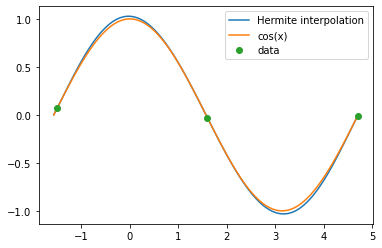

In [5]:
xaxis = np.linspace(-np.pi/2, 3*np.pi/2, 120)
x = np.array([-1.5, 1.6, 4.7])
y = np.array([0.071,-0.029,-0.012])
yprime = np.array([1, -1, 1])
funct = np.cos(xaxis)
interp = hermite(x, y, yprime, xaxis)
plt.plot(xaxis, interp, label='Hermite interpolation')
plt.plot(xaxis, funct, label="cos(x)")
plt.plot(x, y, 'o', label='data')
plt.legend(loc='upper right');

**Exercise 4.3-1**

The following table gives the values of $y=f(x)$ and $y'=f'(x)$ where $f(x)=e^x+\sin 10x$. Compute the Hermite interpolating polynomial and the polynomial interpolant for the data in the table. Plot the two interpolating polynomials together with $f(x)=e^x+\sin 10x$ on $(0,3)$.
\begin{equation*}
\begin{array}{ccccccc}
x & 0 & 0.4 & 1 & 2 & 2.6 & 3\\
\hline
y & 1 & 0.735 & 2.17 & 8.30 & 14.2 & 19.1\\
\hline
y' & 11 & -5.04 & -5.67 & 11.5 & 19.9 &21.6\\
\end{array}
\end{equation*}

**References**

K.E. Atkinson. An Introduction to Numerical Analysis. John Wiley & Sons, 2nd edition, 1989.

R.L. Burden, D. Faires, and A.M. Burden. Numerical Analysis. Cengate, 10th edition, 2016.